In [1]:
import matplotlib.pyplot as plt
import random as random
import networkx as nx
import graphs
import modelz
from tqdm import tqdm
import numpy as np
import psutil

<b> Use the parameters below to obtain same mean degree in all graphs: </b>
<ol>
<li>G_klemm = graphs.klemm_eguiluz(3,10000)</li>
<li>G_barabasi = graphs.barabasi_albert(10000,3)</li>
<li>G_erdos = graphs.erdos_renyi(10000,0.00065)</li>
<li>G_strogatz = graphs.watts_strogatz(10000,7,0.1)</li>
</ol>

In [2]:
print('Total RAM memory (ex SWAP):', psutil.virtual_memory()[0]/10**9)
print('Available RAM memory:', psutil.virtual_memory()[1]/10**9)
print('RAM memory % used:', psutil.virtual_memory()[2])

Total RAM memory (ex SWAP): 17.126875136
Available RAM memory: 9.518288896
RAM memory % used: 44.4


In [2]:
g_klemm = graphs.klemm_eguiluz(3,10000)
g_barabasi = graphs.barabasi_albert(10000,3)
g_erdos = graphs.erdos_renyi(10000,0.00065)
g_strogatz = graphs.watts_strogatz(10000,7,0.1)
gs = [g_klemm, g_barabasi, g_erdos, g_strogatz]

In [8]:
beta = 0.1
gamma = 0.025
m = 0.1
delay = 10
I0 = 20
max_it = 2000
dSIRs = [modelz.delayed_SIR(g.copy(), g.number_of_nodes(), beta, gamma, m, delay, I0) for g in gs]
simulations = [dSIR.full_simulation(max_it) for dSIR in dSIRs]

 27%|██▋       | 540/2000 [00:09<00:25, 58.39it/s] 


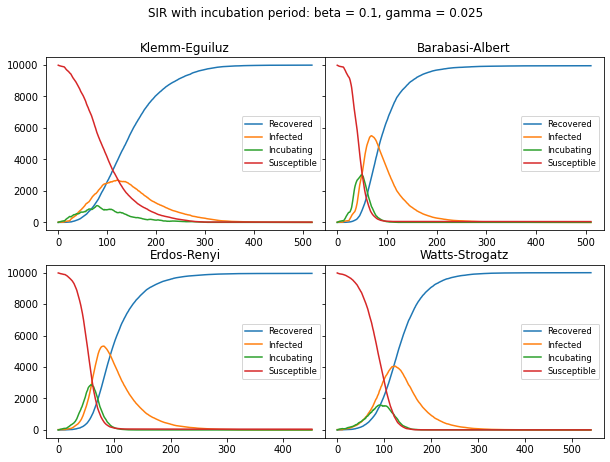

In [9]:
fig = plt.figure(figsize = (10,7))
m = fig.add_gridspec(2, 2, wspace=0)
(ax1, ax2), (ax3, ax4) = m.subplots(sharey='row')
stats = 'beta = ' + str(beta) + ', gamma = ' + str(gamma)
fig.suptitle('SIR with incubation period: ' + stats)
axes = fig.get_axes()
titles = ['Klemm-Eguiluz', 'Barabasi-Albert', 'Erdos-Renyi', 'Watts-Strogatz']
for i in range(4):
    axes[i].plot([it['node_count'][3] for it in simulations[i]], label = 'Recovered')
    axes[i].plot([it['node_count'][2] for it in simulations[i]], label = 'Infected')
    axes[i].plot([it['node_count'][1] for it in simulations[i]], label = 'Incubating')
    axes[i].plot([it['node_count'][0] for it in simulations[i]], label = 'Susceptible')
    axes[i].set_title(titles[i])
    axes[i].legend(loc = 'best' ,fontsize = 'small')
